## Python version

In [1]:
from platform import python_version
print(python_version())

3.6.9


## Import Libraries

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
tf.random.set_seed(1234)

In [4]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

from math import sqrt
from numpy.random import seed
seed(1)
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

## Data Import and Manipulation

In [5]:
train_df = pd.read_csv("H2.csv", dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [6]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [7]:
df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
79325,2017,35
79326,2017,35
79327,2017,35
79328,2017,35


In [8]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
79325    201735
79326    201735
79327    201735
79328    201735
79329    201735
Length: 79330, dtype: object


In [9]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
79325,0.0
79326,0.0
79327,0.0
79328,0.0


In [10]:
type(df1)

pandas.core.frame.DataFrame

In [11]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'IsCanceled']

In [12]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
0,201527,0.0
6,201527,0.0
10,201527,0.0
11,201527,0.0
12,201527,0.0
...,...,...
33650,201735,1.0
33651,201735,1.0
33652,201735,1.0
33653,201735,1.0


In [13]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,97.0
201528,153.0
201529,228.0
201530,321.0
201531,159.0
...,...
201731,253.0
201732,269.0
201733,341.0


In [14]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     97.0
201528    153.0
201529    228.0
201530    321.0
201531    159.0
          ...  
201731    253.0
201732    269.0
201733    341.0
201734    201.0
201735    129.0
Name: IsCanceled, Length: 115, dtype: float64

In [15]:
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.076840
p-value: 0.028315
Critical Values:
	1%: -3.495
	5%: -2.890
	10%: -2.582


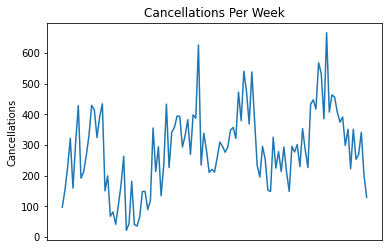

In [16]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Cancellations')
plt.title("Cancellations Per Week")
plt.show()

In [17]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,97.0
201528,153.0
201529,228.0
201530,321.0
201531,159.0
...,...
201731,253.0
201732,269.0
201733,341.0


In [18]:
df = df[:100]

In [19]:
df

,IsCanceled
FullDate,
201527,97.0
201528,153.0
201529,228.0
201530,321.0
201531,159.0
...,...
201716,417.0
201717,568.0
201718,532.0


In [20]:
df=np.array(df)

### Training and Validation data partition

In [21]:
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

### Form dataset matrix

In [22]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
df

array([[ 97.],
       [153.],
       [228.],
       [321.],
       [159.],
       [308.],
       [428.],
       [191.],
       [212.],
       [266.],
       [331.],
       [429.],
       [414.],
       [324.],
       [391.],
       [434.],
       [150.],
       [199.],
       [ 67.],
       [ 81.],
       [ 41.],
       [103.],
       [169.],
       [263.],
       [ 21.],
       [ 43.],
       [181.],
       [ 40.],
       [ 35.],
       [ 65.],
       [148.],
       [148.],
       [ 89.],
       [117.],
       [355.],
       [213.],
       [294.],
       [134.],
       [233.],
       [433.],
       [226.],
       [341.],
       [357.],
       [394.],
       [393.],
       [293.],
       [330.],
       [382.],
       [269.],
       [398.],
       [387.],
       [626.],
       [234.],
       [338.],
       [283.],
       [210.],
       [220.],
       [211.],
       [257.],
       [309.],
       [295.],
       [276.],
       [293.],
       [348.],
       [357.],
       [321.],
       [47

## Normalize dataset with MinMaxScaler

In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
train

array([[0.12561983],
       [0.21818182],
       [0.34214876],
       [0.49586777],
       [0.22809917],
       [0.47438017],
       [0.67272727],
       [0.28099174],
       [0.31570248],
       [0.40495868],
       [0.51239669],
       [0.67438017],
       [0.64958678],
       [0.50082645],
       [0.61157025],
       [0.68264463],
       [0.21322314],
       [0.29421488],
       [0.07603306],
       [0.09917355],
       [0.03305785],
       [0.13553719],
       [0.2446281 ],
       [0.4       ],
       [0.        ],
       [0.03636364],
       [0.26446281],
       [0.03140496],
       [0.0231405 ],
       [0.07272727],
       [0.20991736],
       [0.20991736],
       [0.11239669],
       [0.15867769],
       [0.55206612],
       [0.31735537],
       [0.45123967],
       [0.18677686],
       [0.35041322],
       [0.68099174],
       [0.33884298],
       [0.52892562],
       [0.5553719 ],
       [0.61652893],
       [0.61487603],
       [0.44958678],
       [0.5107438 ],
       [0.596

In [25]:
val = scaler.fit_transform(val)
val

array([[0.14671815],
       [0.25096525],
       [0.12548263],
       [0.27992278],
       [0.12162162],
       [0.        ],
       [0.28378378],
       [0.24903475],
       [0.2953668 ],
       [0.15637066],
       [0.3957529 ],
       [0.26061776],
       [0.15057915],
       [0.54826255],
       [0.57722008],
       [0.51930502],
       [0.81081081],
       [0.74131274],
       [0.45752896],
       [1.        ]])

In [26]:
# Lookback period
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_val, Y_val = create_dataset(val, lookback)

In [27]:
X_train

array([[0.12561983, 0.21818182, 0.34214876, 0.49586777, 0.22809917],
       [0.21818182, 0.34214876, 0.49586777, 0.22809917, 0.47438017],
       [0.34214876, 0.49586777, 0.22809917, 0.47438017, 0.67272727],
       [0.49586777, 0.22809917, 0.47438017, 0.67272727, 0.28099174],
       [0.22809917, 0.47438017, 0.67272727, 0.28099174, 0.31570248],
       [0.47438017, 0.67272727, 0.28099174, 0.31570248, 0.40495868],
       [0.67272727, 0.28099174, 0.31570248, 0.40495868, 0.51239669],
       [0.28099174, 0.31570248, 0.40495868, 0.51239669, 0.67438017],
       [0.31570248, 0.40495868, 0.51239669, 0.67438017, 0.64958678],
       [0.40495868, 0.51239669, 0.67438017, 0.64958678, 0.50082645],
       [0.51239669, 0.67438017, 0.64958678, 0.50082645, 0.61157025],
       [0.67438017, 0.64958678, 0.50082645, 0.61157025, 0.68264463],
       [0.64958678, 0.50082645, 0.61157025, 0.68264463, 0.21322314],
       [0.50082645, 0.61157025, 0.68264463, 0.21322314, 0.29421488],
       [0.61157025, 0.68264463, 0.

In [28]:
Y_train

array([0.47438017, 0.67272727, 0.28099174, 0.31570248, 0.40495868,
       0.51239669, 0.67438017, 0.64958678, 0.50082645, 0.61157025,
       0.68264463, 0.21322314, 0.29421488, 0.07603306, 0.09917355,
       0.03305785, 0.13553719, 0.2446281 , 0.4       , 0.        ,
       0.03636364, 0.26446281, 0.03140496, 0.0231405 , 0.07272727,
       0.20991736, 0.20991736, 0.11239669, 0.15867769, 0.55206612,
       0.31735537, 0.45123967, 0.18677686, 0.35041322, 0.68099174,
       0.33884298, 0.52892562, 0.5553719 , 0.61652893, 0.61487603,
       0.44958678, 0.5107438 , 0.59669421, 0.40991736, 0.6231405 ,
       0.60495868, 1.        , 0.35206612, 0.52396694, 0.43305785,
       0.31239669, 0.32892562, 0.31404959, 0.39008264, 0.47603306,
       0.45289256, 0.4214876 , 0.44958678, 0.54049587, 0.5553719 ,
       0.49586777, 0.74545455, 0.59173554, 0.85785124, 0.74710744,
       0.57355372, 0.85454545, 0.6       , 0.35041322, 0.28760331,
       0.45289256, 0.38347107, 0.21652893, 0.20991736])

## Configure LSTM model

Epoch 1/20
59/59 - 0s - loss: 0.0735 - val_loss: 0.0615
Epoch 2/20
59/59 - 0s - loss: 0.0388 - val_loss: 0.0376
Epoch 3/20
59/59 - 0s - loss: 0.0320 - val_loss: 0.0338
Epoch 4/20
59/59 - 0s - loss: 0.0311 - val_loss: 0.0332
Epoch 5/20
59/59 - 0s - loss: 0.0313 - val_loss: 0.0330
Epoch 6/20
59/59 - 0s - loss: 0.0311 - val_loss: 0.0328
Epoch 7/20
59/59 - 0s - loss: 0.0312 - val_loss: 0.0326
Epoch 8/20
59/59 - 0s - loss: 0.0312 - val_loss: 0.0325
Epoch 9/20
59/59 - 0s - loss: 0.0327 - val_loss: 0.0327
Epoch 10/20
59/59 - 0s - loss: 0.0306 - val_loss: 0.0319
Epoch 11/20
59/59 - 0s - loss: 0.0305 - val_loss: 0.0322
Epoch 12/20
59/59 - 0s - loss: 0.0312 - val_loss: 0.0318
Epoch 13/20
59/59 - 0s - loss: 0.0302 - val_loss: 0.0316
Epoch 14/20
59/59 - 0s - loss: 0.0302 - val_loss: 0.0317
Epoch 15/20
59/59 - 0s - loss: 0.0300 - val_loss: 0.0308
Epoch 16/20
59/59 - 0s - loss: 0.0298 - val_loss: 0.0312
Epoch 17/20
59/59 - 0s - loss: 0.0296 - val_loss: 0.0305
Epoch 18/20
59/59 - 0s - loss: 0.0295 - 

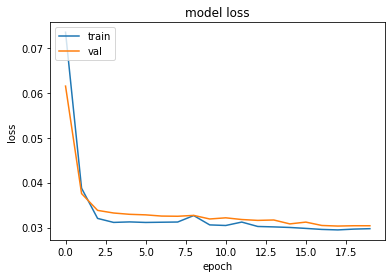

In [29]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=1, verbose=2)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [31]:
trainpred

array([[0.2862504 ],
       [0.40297306],
       [0.46644175],
       [0.36749193],
       [0.39303473],
       [0.4249129 ],
       [0.42848247],
       [0.46531695],
       [0.49423864],
       [0.4940658 ],
       [0.5447918 ],
       [0.55649906],
       [0.42240238],
       [0.431204  ],
       [0.33252674],
       [0.27535757],
       [0.20001814],
       [0.20677629],
       [0.22229311],
       [0.2792463 ],
       [0.17317045],
       [0.21197218],
       [0.27907428],
       [0.17656478],
       [0.15055466],
       [0.18367049],
       [0.21418887],
       [0.20212483],
       [0.19005892],
       [0.22811407],
       [0.35602114],
       [0.28941384],
       [0.36770573],
       [0.32297924],
       [0.38361332],
       [0.45015535],
       [0.35987163],
       [0.44546905],
       [0.47604766],
       [0.5034349 ],
       [0.50622934],
       [0.48758385],
       [0.5065954 ],
       [0.51455504],
       [0.45426023],
       [0.511896  ],
       [0.50655353],
       [0.617

In [32]:
valpred

array([[0.2281484 ],
       [0.18742213],
       [0.27041024],
       [0.24771473],
       [0.25866792],
       [0.24172953],
       [0.34314436],
       [0.29770067],
       [0.26489577],
       [0.3945387 ],
       [0.40519232],
       [0.4127321 ],
       [0.5444021 ],
       [0.5660369 ]], dtype=float32)

In [33]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [34]:
Y_train.shape

(1, 74)

In [35]:
Y_val.shape

(1, 14)

In [36]:
X_train.shape

(74, 1, 5)

In [37]:
X_val.shape

(14, 1, 5)

In [38]:
Y_train

array([[393.72892562, 496.47272727, 293.55371901, 311.5338843 ,
        357.76859504, 413.4214876 , 497.32892562, 484.48595041,
        407.42809917, 464.79338843, 501.60991736, 258.44958678,
        300.40330579, 187.38512397, 199.37190083, 165.12396694,
        218.20826446, 274.71735537, 355.2       , 148.        ,
        166.83636364, 284.99173554, 164.2677686 , 159.98677686,
        185.67272727, 256.73719008, 256.73719008, 206.2214876 ,
        230.19504132, 433.97024793, 312.39008264, 381.74214876,
        244.75041322, 329.51404959, 500.75371901, 323.52066116,
        421.98347107, 435.68264463, 467.36198347, 466.50578512,
        380.88595041, 412.56528926, 457.08760331, 360.33719008,
        470.78677686, 461.36859504, 666.        , 330.37024793,
        419.41487603, 372.32396694, 309.8214876 , 318.38347107,
        310.67768595, 350.06280992, 394.58512397, 382.59834711,
        366.33057851, 380.88595041, 427.9768595 , 435.68264463,
        404.85950413, 534.14545455, 454.

In [39]:
Y_val

array([[148., 295., 277., 301., 229., 353., 283., 226., 432., 447., 417.,
        568., 532., 385.]])

In [40]:
X_train

array([[[0.12561983, 0.21818182, 0.34214876, 0.49586777, 0.22809917]],

       [[0.21818182, 0.34214876, 0.49586777, 0.22809917, 0.47438017]],

       [[0.34214876, 0.49586777, 0.22809917, 0.47438017, 0.67272727]],

       [[0.49586777, 0.22809917, 0.47438017, 0.67272727, 0.28099174]],

       [[0.22809917, 0.47438017, 0.67272727, 0.28099174, 0.31570248]],

       [[0.47438017, 0.67272727, 0.28099174, 0.31570248, 0.40495868]],

       [[0.67272727, 0.28099174, 0.31570248, 0.40495868, 0.51239669]],

       [[0.28099174, 0.31570248, 0.40495868, 0.51239669, 0.67438017]],

       [[0.31570248, 0.40495868, 0.51239669, 0.67438017, 0.64958678]],

       [[0.40495868, 0.51239669, 0.67438017, 0.64958678, 0.50082645]],

       [[0.51239669, 0.67438017, 0.64958678, 0.50082645, 0.61157025]],

       [[0.67438017, 0.64958678, 0.50082645, 0.61157025, 0.68264463]],

       [[0.64958678, 0.50082645, 0.61157025, 0.68264463, 0.21322314]],

       [[0.50082645, 0.61157025, 0.68264463, 0.21322314, 0.29421

In [41]:
X_val

array([[[0.14671815, 0.25096525, 0.12548263, 0.27992278, 0.12162162]],

       [[0.25096525, 0.12548263, 0.27992278, 0.12162162, 0.        ]],

       [[0.12548263, 0.27992278, 0.12162162, 0.        , 0.28378378]],

       [[0.27992278, 0.12162162, 0.        , 0.28378378, 0.24903475]],

       [[0.12162162, 0.        , 0.28378378, 0.24903475, 0.2953668 ]],

       [[0.        , 0.28378378, 0.24903475, 0.2953668 , 0.15637066]],

       [[0.28378378, 0.24903475, 0.2953668 , 0.15637066, 0.3957529 ]],

       [[0.24903475, 0.2953668 , 0.15637066, 0.3957529 , 0.26061776]],

       [[0.2953668 , 0.15637066, 0.3957529 , 0.26061776, 0.15057915]],

       [[0.15637066, 0.3957529 , 0.26061776, 0.15057915, 0.54826255]],

       [[0.3957529 , 0.26061776, 0.15057915, 0.54826255, 0.57722008]],

       [[0.26061776, 0.15057915, 0.54826255, 0.57722008, 0.51930502]],

       [[0.15057915, 0.54826255, 0.57722008, 0.51930502, 0.81081081]],

       [[0.54826255, 0.57722008, 0.51930502, 0.81081081, 0.74131

In [42]:
# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 88.51 RMSE
Validation Score: 94.14 RMSE


In [43]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[lookback:len(trainpred)+lookback, :] = trainpred

In [44]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(lookback*2)+1:len(df)-1, :] = valpred

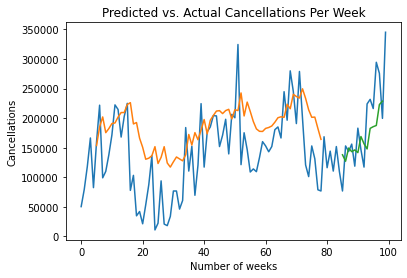

In [45]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(scaler.inverse_transform(trainpredPlot))
valpred, =plt.plot(scaler.inverse_transform(valpredPlot))
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.show()

In [46]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [47]:
Y_val

0     148.0
1     295.0
2     277.0
3     301.0
4     229.0
5     353.0
6     283.0
7     226.0
8     432.0
9     447.0
10    417.0
11    568.0
12    532.0
13    385.0
dtype: float64

In [48]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [49]:
predictions

0     266.180878
1     245.084671
2     288.072510
3     276.316223
4     281.989990
5     273.215912
6     325.748779
7     302.208954
8     285.216003
9     352.371033
10    357.889618
11    361.795227
12    430.000305
13    441.207092
dtype: float32

In [50]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [51]:
mda(Y_val, predictions)

0.8571428571428571

In [52]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 94.141480


In [53]:
forecast_error = (predictions-Y_val)
forecast_error

0     118.180878
1     -49.915329
2      11.072510
3     -24.683777
4      52.989990
5     -79.784088
6      42.748779
7      76.208954
8    -146.783997
9     -94.628967
10    -59.110382
11   -206.204773
12   -101.999695
13     56.207092
dtype: float64

In [54]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-28.97877175467355

In [55]:
X_train

array([[[0.12561983, 0.21818182, 0.34214876, 0.49586777, 0.22809917]],

       [[0.21818182, 0.34214876, 0.49586777, 0.22809917, 0.47438017]],

       [[0.34214876, 0.49586777, 0.22809917, 0.47438017, 0.67272727]],

       [[0.49586777, 0.22809917, 0.47438017, 0.67272727, 0.28099174]],

       [[0.22809917, 0.47438017, 0.67272727, 0.28099174, 0.31570248]],

       [[0.47438017, 0.67272727, 0.28099174, 0.31570248, 0.40495868]],

       [[0.67272727, 0.28099174, 0.31570248, 0.40495868, 0.51239669]],

       [[0.28099174, 0.31570248, 0.40495868, 0.51239669, 0.67438017]],

       [[0.31570248, 0.40495868, 0.51239669, 0.67438017, 0.64958678]],

       [[0.40495868, 0.51239669, 0.67438017, 0.64958678, 0.50082645]],

       [[0.51239669, 0.67438017, 0.64958678, 0.50082645, 0.61157025]],

       [[0.67438017, 0.64958678, 0.50082645, 0.61157025, 0.68264463]],

       [[0.64958678, 0.50082645, 0.61157025, 0.68264463, 0.21322314]],

       [[0.50082645, 0.61157025, 0.68264463, 0.21322314, 0.29421

In [56]:
X_train.shape

(74, 1, 5)

## Validate Predictions on Test Data

In [57]:
# Test (unseen) predictions
# (t) and (t-5)
Xnew = np.array([tseries.iloc[95:100],tseries.iloc[96:101],tseries.iloc[97:102],tseries.iloc[98:103],tseries.iloc[99:104],tseries.iloc[100:105],tseries.iloc[101:106],tseries.iloc[102:107],tseries.iloc[103:108],tseries.iloc[104:109],tseries.iloc[105:110],tseries.iloc[106:111],tseries.iloc[107:112],tseries.iloc[108:113],tseries.iloc[109:114]])

In [58]:
Xnew

array([[417., 568., 532., 385., 666.],
       [568., 532., 385., 666., 407.],
       [532., 385., 666., 407., 463.],
       [385., 666., 407., 463., 456.],
       [666., 407., 463., 456., 407.],
       [407., 463., 456., 407., 374.],
       [463., 456., 407., 374., 391.],
       [456., 407., 374., 391., 298.],
       [407., 374., 391., 298., 351.],
       [374., 391., 298., 351., 222.],
       [391., 298., 351., 222., 351.],
       [298., 351., 222., 351., 253.],
       [351., 222., 351., 253., 269.],
       [222., 351., 253., 269., 341.],
       [351., 253., 269., 341., 201.]])

In [59]:
Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [60]:
Xnew.shape

(15, 5)

In [61]:
ynew

array([[0.63971955],
       [0.51149243],
       [0.5521302 ],
       [0.5207744 ],
       [0.49080825],
       [0.43026423],
       [0.43273112],
       [0.34770796],
       [0.35657313],
       [0.24842843],
       [0.3095932 ],
       [0.22141275],
       [0.21947318],
       [0.26446947],
       [0.17358491]], dtype=float32)

In [62]:
type(ynew)

numpy.ndarray

In [63]:
ynew.shape

(15, 1)

In [64]:
actual = tseries.iloc[100:115]
actual

FullDate
201721    407.0
201722    463.0
201723    456.0
201724    407.0
201725    374.0
201726    391.0
201727    298.0
201728    351.0
201729    222.0
201730    351.0
201731    253.0
201732    269.0
201733    341.0
201734    201.0
201735    129.0
Name: IsCanceled, dtype: float64

In [65]:
actual = np.array(actual)
actual

array([407., 463., 456., 407., 374., 391., 298., 351., 222., 351., 253.,
       269., 341., 201., 129.])

In [66]:
actual=actual.reshape(15,-1)
actual.shape

(15, 1)

In [67]:
actual

array([[407.],
       [463.],
       [456.],
       [407.],
       [374.],
       [391.],
       [298.],
       [351.],
       [222.],
       [351.],
       [253.],
       [269.],
       [341.],
       [201.],
       [129.]])

In [68]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [69]:
np.min(df)

21.0

In [70]:
ynew

array([0.63971955, 0.51149243, 0.5521302 , 0.5207744 , 0.49080825,
       0.43026423, 0.43273112, 0.34770796, 0.35657313, 0.24842843,
       0.3095932 , 0.22141275, 0.21947318, 0.26446947, 0.17358491],
      dtype=float32)

In [71]:
maxcancel=np.max(tseries)

In [72]:
mincancel=np.min(tseries)

In [73]:
ynew = ynew * np.abs(maxcancel-mincancel) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [74]:
actualpd

0     407.0
1     463.0
2     456.0
3     407.0
4     374.0
5     391.0
6     298.0
7     351.0
8     222.0
9     351.0
10    253.0
11    269.0
12    341.0
13    201.0
14    129.0
dtype: float64

In [75]:
ynewpd

0     433.619110
1     350.912628
2     377.123993
3     356.899506
4     337.571320
5     298.520416
6     300.111572
7     245.271637
8     250.989670
9     181.236343
10    220.687622
11    163.811218
12    162.560196
13    191.582809
14    132.962265
dtype: float32

In [76]:
mda(actualpd, ynewpd)

0.8666666666666667

In [77]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 88.234583


In [78]:
forecast_error = (ynewpd-actualpd)
forecast_error

0      26.619110
1    -112.087372
2     -78.876007
3     -50.100494
4     -36.428680
5     -92.479584
6       2.111572
7    -105.728363
8      28.989670
9    -169.763657
10    -32.312378
11   -105.188782
12   -178.439804
13     -9.417191
14      3.962265
dtype: float64

In [79]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-60.60931294759114

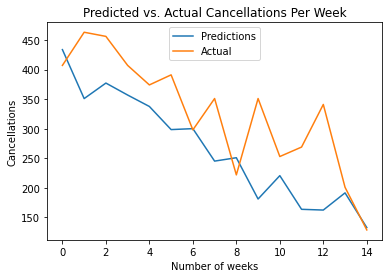

In [80]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()

In [81]:
np.mean(ynewpd)

266.924